📊 Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       192
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         1
           3       1.00      0.67      0.80         3

    accuracy                           0.99       200
   macro avg       1.00      0.92      0.95       200
weighted avg       1.00      0.99      0.99       200



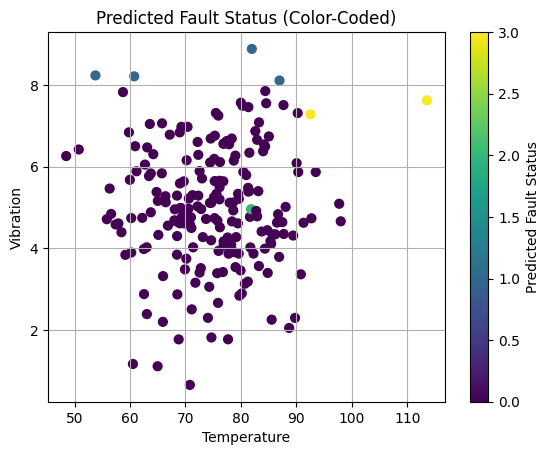

✅ Model saved as 'fault_decision_model.pkl'

🧠 Input Sample: {'temperature': 95, 'vibration': 8.5, 'pressure': 25, 'runtime_hours': 600}
🔧 Predicted Action: REPAIR


In [3]:
# 1. Install dependencies (if needed)
!pip install scikit-learn pandas matplotlib --quiet

# 2. Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import joblib

# 3. Generate Simulated Data for Equipment Monitoring
np.random.seed(42)
n_samples = 1000

data = {
    'temperature': np.random.normal(75, 10, n_samples),
    'vibration': np.random.normal(5, 1.5, n_samples),
    'pressure': np.random.normal(30, 5, n_samples),
    'runtime_hours': np.random.normal(500, 100, n_samples),
}

df = pd.DataFrame(data)

# Add labels:
# 0 - Normal, 1 - Minor fault (Repair), 2 - Major fault (Replace), 3 - Critical (Alert)
conditions = (
    (df['temperature'] > 90) & (df['vibration'] > 7),
    (df['temperature'] > 80) & (df['pressure'] < 20),
    (df['vibration'] > 8),
    (df['temperature'] < 85) & (df['vibration'] < 6)
)

choices = [3, 2, 1, 0]
df['status'] = np.select(conditions, choices, default=0)

# 4. Train/Test Split
X = df[['temperature', 'vibration', 'pressure', 'runtime_hours']]
y = df['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 6. Evaluate the model
y_pred = model.predict(X_test)
print("📊 Classification Report:\n")
print(classification_report(y_test, y_pred))

# 7. Visualize sample results
plt.scatter(X_test['temperature'], X_test['vibration'], c=y_pred, cmap='viridis', s=40)
plt.colorbar(label='Predicted Fault Status')
plt.xlabel("Temperature")
plt.ylabel("Vibration")
plt.title("Predicted Fault Status (Color-Coded)")
plt.grid(True)
plt.show()

# 8. Save the model
joblib.dump(model, 'fault_decision_model.pkl')
print("✅ Model saved as 'fault_decision_model.pkl'")

# 9. Predict on a new sample
sample = pd.DataFrame([{
    'temperature': 95,
    'vibration': 8.5,
    'pressure': 25,
    'runtime_hours': 600
}])

prediction = model.predict(sample)[0]

action_map = {
    0: "NO ACTION",
    1: "REPAIR",
    2: "REPLACE",
    3: "ALERT"
}

print("\n🧠 Input Sample:", sample.to_dict(orient='records')[0])
print("🔧 Predicted Action:", action_map[prediction])
